# MongoDB Statistics

In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_style("white", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.set(font_scale=1.4)

def get_db(db_name):
    client = MongoClient('localhost:27017')
    db = client[db_name]
    return db

def aggregate(db, pipeline):
    return [doc for doc in db.openStreetDataMap.aggregate(pipeline)]

## How city Invested in infrastructure ?

In [2]:
def get_amenities():
    match = {"$match": {"amenity": {"$exists": 1}}}
    group = {"$group": {"_id": "$amenity", "total": {"$sum": 1}}}
    sort = {"$sort": {"total": -1}}
    project = {"$project": {"_id": 0, "amenity": "$_id", "count": "$total"}}
    pipeline = [match, group, sort, project]
    db = get_db('udacity')
    return aggregate(db, pipeline)

def plot_top_10_amenities(amenity_count):
    amenities = [each['amenity'] for each in amenity_count]
    counts = [each['count'] for each in amenity_count]
    data = pd.DataFrame({'amenity': amenities, 'count': counts})
    a4_dims = (15.7, 7.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.barplot("amenity", y="count", data=data.head(10), palette="Blues_d")
    ax.set_xlabel("\nAmenity",fontsize=20)
    ax.set_ylabel("How many?\n",fontsize=20)
    ax.axes.set_title("Infrastructure Investment",fontsize=30)
    labels = ax.get_xticklabels()
    labels = [each.get_text() for each in ax.get_xticklabels()]
    new_label = []
    for each in labels:
        k = each.split('_')
        if len(k) > 1:
            new_label.append("\n".join(k))
        else:
            new_label.append(k[0])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
    ax.set(xticklabels=new_label)
    ax.set_facecolor('white')
    sns.despine()
    plt.show()
    
    

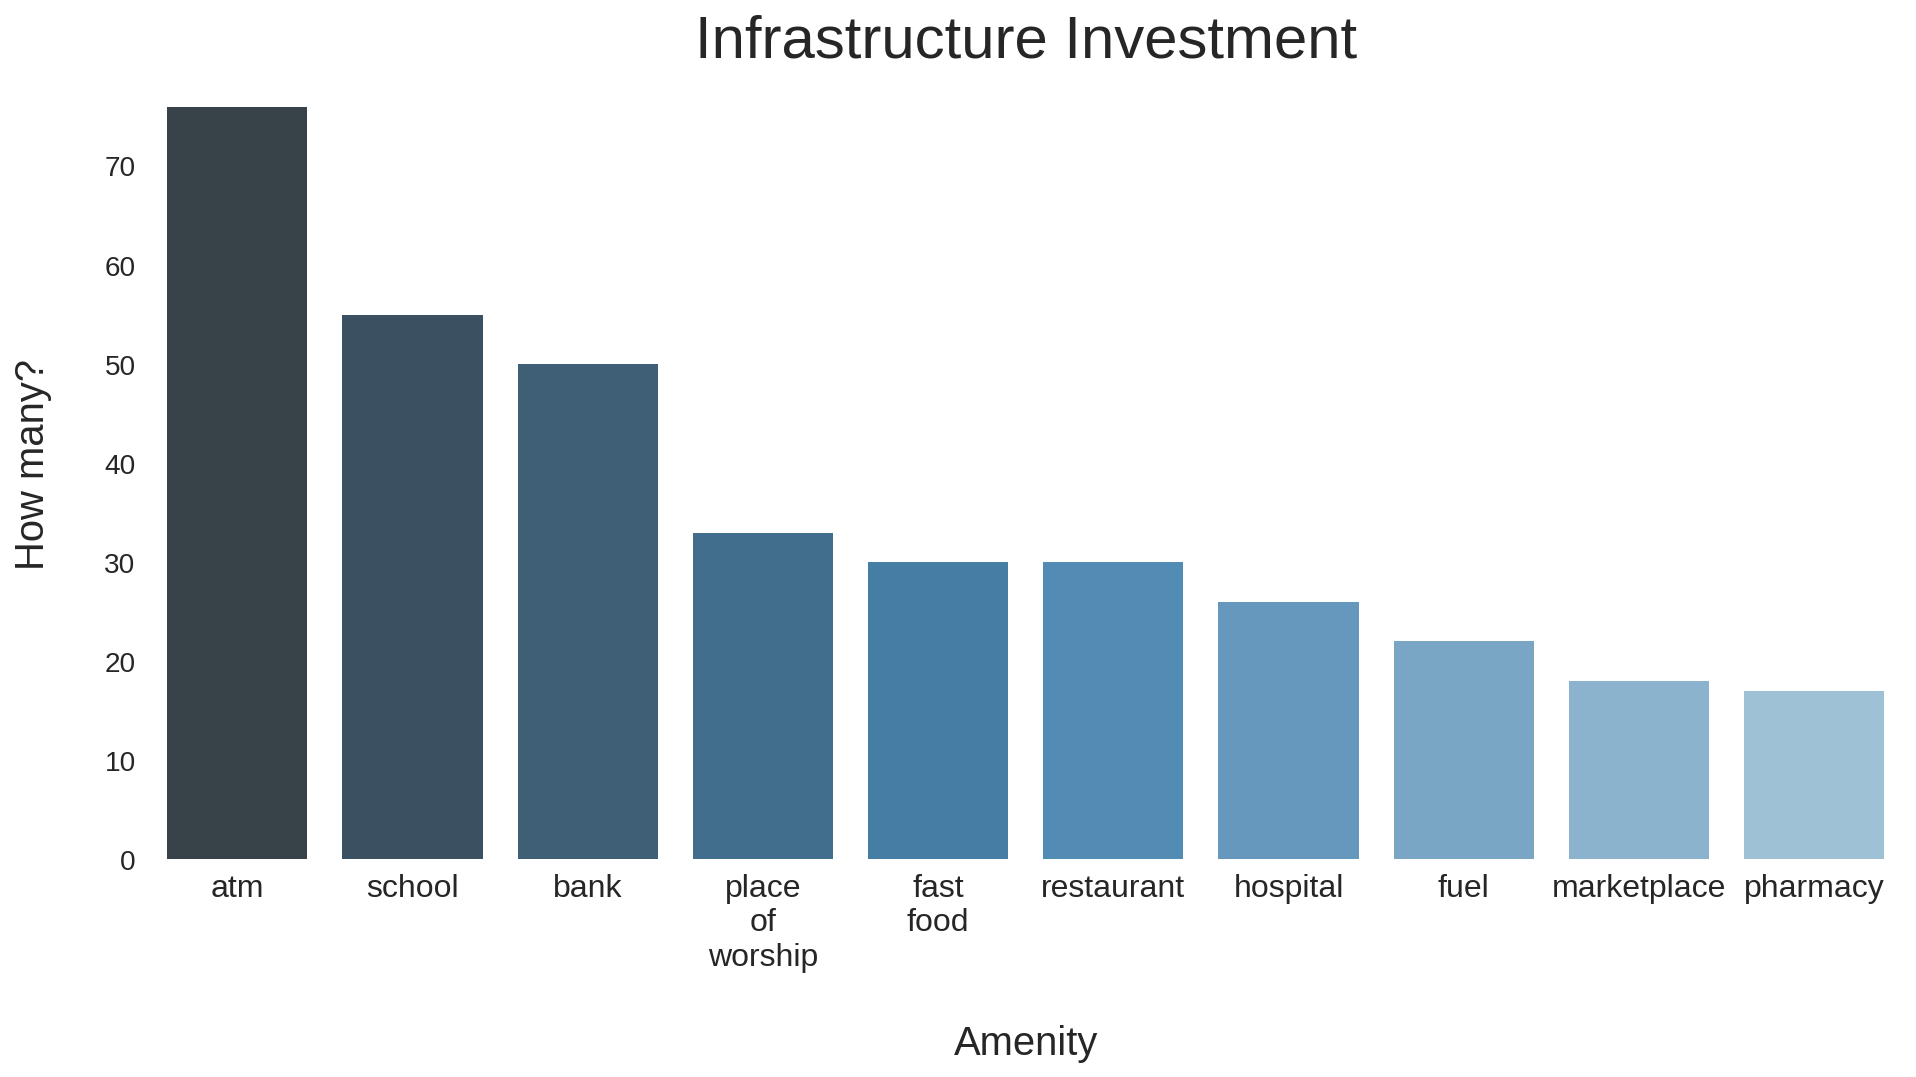

In [3]:
plot_top_10_amenities(get_amenities())

## What is the diversity of Religion?

In [4]:

def religion_plot():
    a4_dims = (16.7, 7.27)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=a4_dims)
    plot_place_of_worship(get_place_of_worship(), ax1)
    plot_top_3_worship_place(get_hindu_worships(), ax2)
    plt.show()
def get_place_of_worship():
    match = {"$match": {"amenity": {"$exists": 1, "$in": ["place_of_worship"]}}}
    group = {"$group": {"_id": "$religion", "total": {"$sum": 1}}}
    sort = {"$sort": {"total": -1}}
    project = {"$project": {"_id": 0, "religion": "$_id", "count": "$total"}}
    pipeline = [match, group, sort, project]
    db = get_db('udacity')
    return aggregate(db, pipeline)

def get_hindu_worships():
    match1 = {"$match": {"amenity": {"$exists": 1, "$in": ["place_of_worship"]}}}
    match2 = {"$match": {"religion": {"$exists": 1, "$in": ["hindu"]}}}
    group = {"$group": {"_id": "$name", "total": {"$sum": 1}}}
    sort = {"$sort": {"total": -1}}
    project = {"$project": {"_id": 0, "monument": "$_id", "count": "$total"}}
    pipeline = [match1, match2, group, sort, project]
    db = get_db('udacity')
    return aggregate(db, pipeline)

def plot_place_of_worship(worshipper_count, ax1):
    faiths = [faith['religion'] for faith in worshipper_count]
    worshippers = [worshippers['count'] for worshippers in worshipper_count]
#     data = pd.DataFrame({'religion': faiths, 'count': worshippers})
    labels = faiths
    sizes = worshippers
    explode = (0.1, 0, 0, 0, 0)
#     fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.axes.set_title("Diversity of Religion\n",fontsize=30)
#     plt.show()

def plot_top_3_worship_place(hindu_monuments, ax2):
    monuments = [monument['monument'] for monument in hindu_monuments]
    temples = [temple['count'] for temple in hindu_monuments][:5]
    monuments = [*map(lambda e: "\n".join(e.split()), monuments)][:5]
    data = pd.DataFrame({'monument': monuments, 'count': temples})
    sns.barplot("monument", y="count", data=data.head(10), palette="Reds_d")
    ax2.set_xlabel("\nMonuments",fontsize=20)
    ax2.set_ylabel("\nHow many?",fontsize=20)
    ax2.axes.set_title("Most popular hindu temples\n",fontsize=30)
    ax2.set_facecolor('white')

    
#     print(monuments[:3], temples[:3])

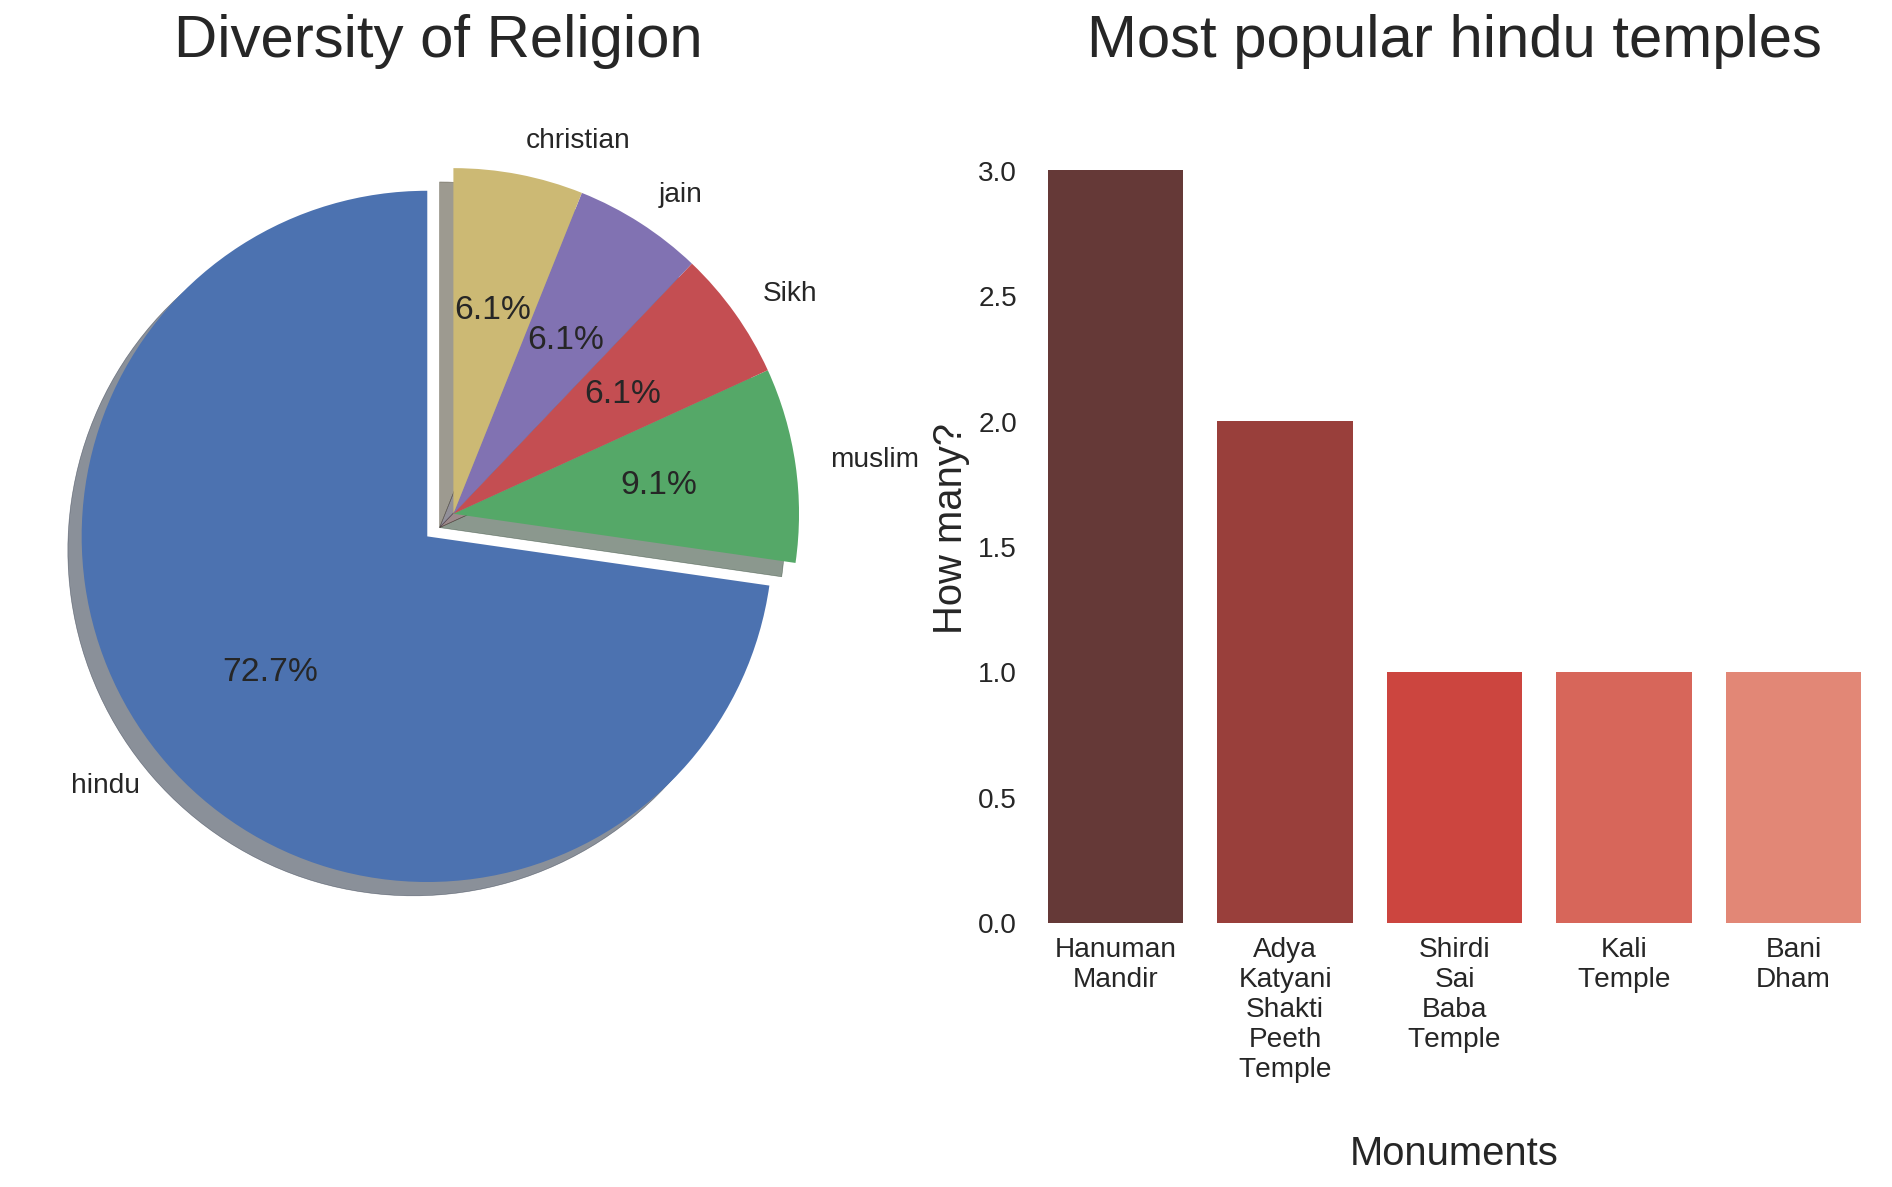

In [5]:
religion_plot()

## Which bank has most atm to banking network?

In [6]:
def get_bankAndATMs():
    match1 = {"$match": {"amenity": {"$exists": 1, "$in": ["atm", "bank"]}}}
    group = {"$group": {"_id": "$name", "total": {"$sum": 1}}}
    sort = {"$sort": {"total": -1}}
    project = {"$project": {"_id": 0, "bank_or_atm": "$_id", "count": "$total"}}
    pipeline = [match1, group, sort, project]
    db = get_db('udacity')
    return aggregate(db, pipeline)

def plot_top_10_operators(bankATMcounts):
    operators = [each['bank_or_atm'] for each in bankATMcounts]
    counts = [each['count'] for each in bankATMcounts]
    data = pd.DataFrame({'bank_or_atm': operators, 'count': counts}).head(10)
    a4_dims = (15.7, 7.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.barplot("bank_or_atm", y="count", data=data, palette=sns.cubehelix_palette(10, reverse=True))
    labels = ax.get_xticklabels()
    labels = [each.get_text() for each in ax.get_xticklabels()]
    new_label = []
    for each in labels:
        k = each.split(' ')
        if len(k) > 1:
            new_label.append("\n".join(k))
        else:
            new_label.append(k[0])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
    ax.set(xticklabels=new_label)
    ax.set_xlabel("Operators",fontsize=20)
    ax.set_ylabel("How many?\n",fontsize=20)
    ax.axes.set_title("ATM and Banking Network",fontsize=30)
    ax.set_facecolor('white')
    plt.show()
#     return data

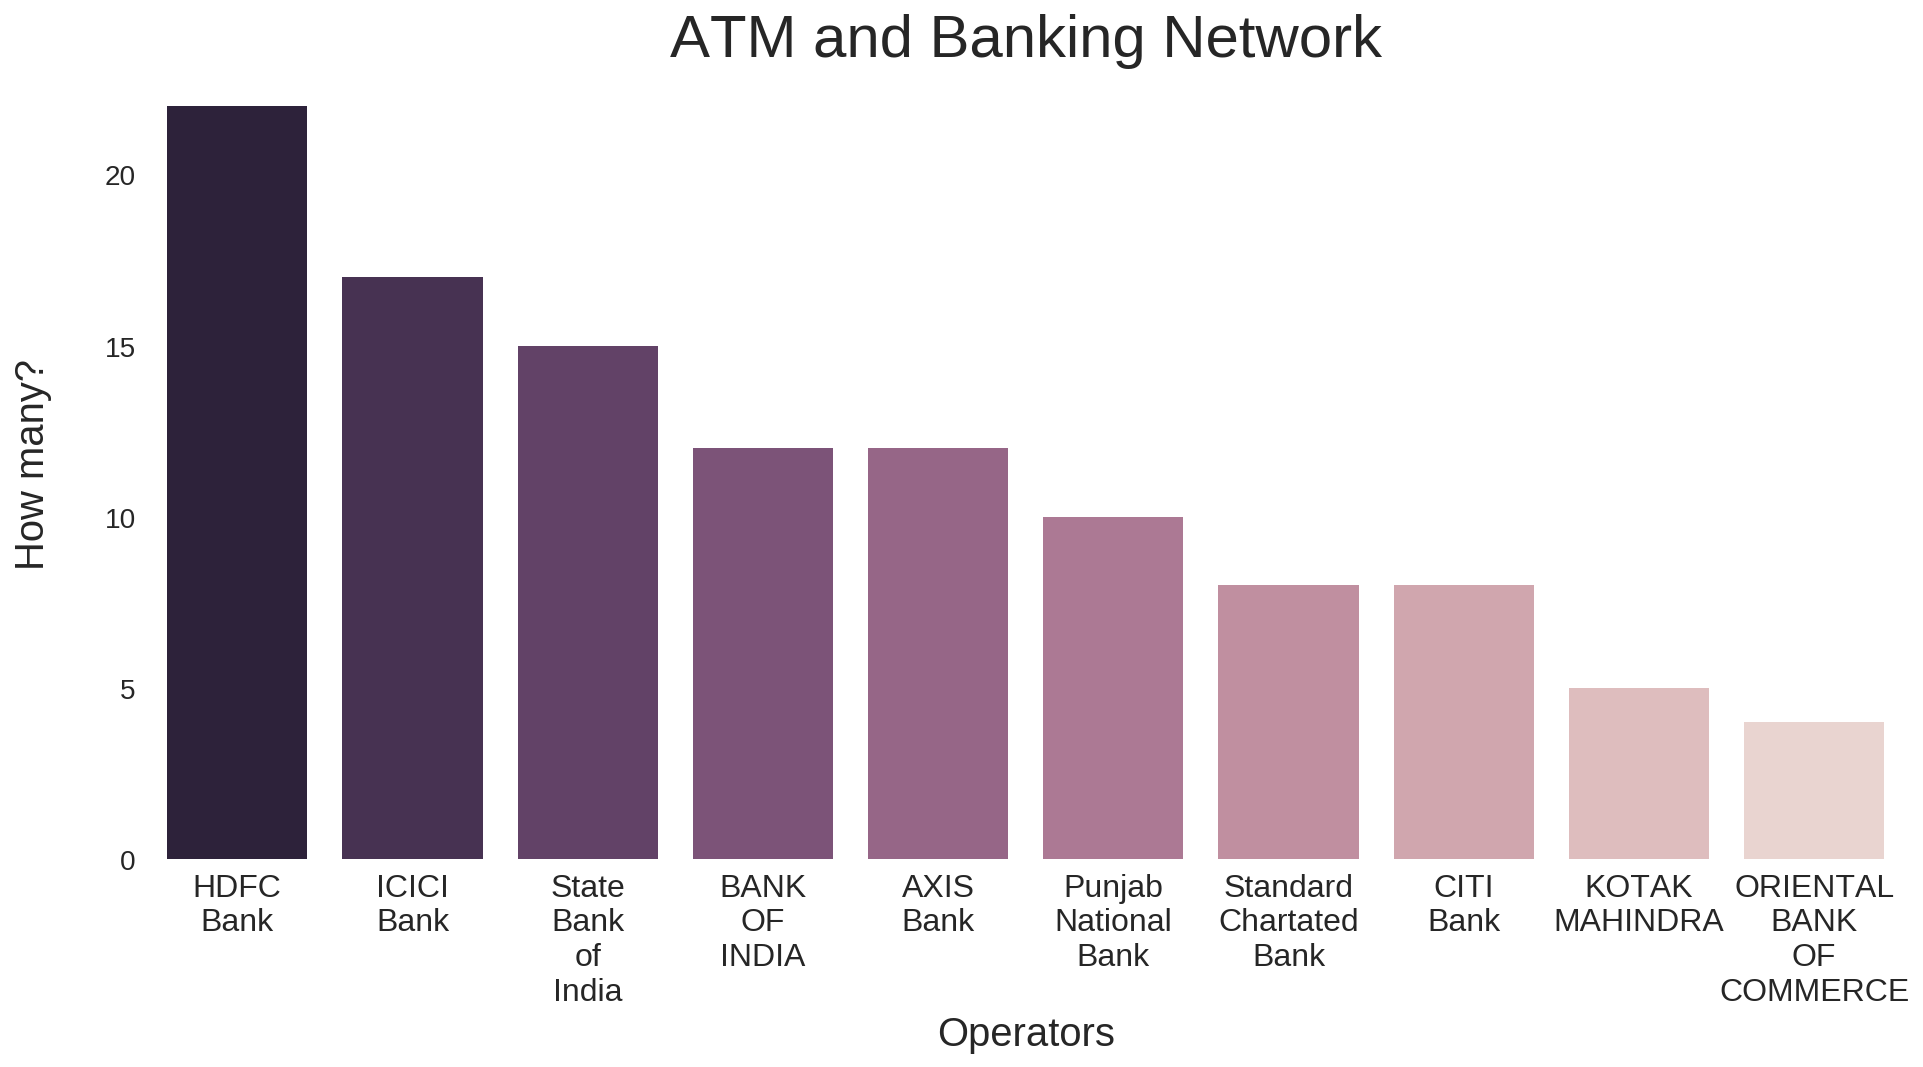

In [7]:
plot_top_10_operators(get_bankAndATMs())

## How citizens focus on education?

In [25]:
def getEducation():
    match1 = {"$match": {"amenity": {"$exists": 1, "$in": ["school", "college", "university", "kindergarten"]}}}
    group = {"$group": {"_id": "$amenity", "total": {"$sum": 1}}}
    sort = {"$sort": {"total": -1}}
    project = {"$project": {"_id": 0, "educationLevel": "$_id", "count": "$total"}}
    pipeline = [match1, group, sort, project]
    db = get_db('udacity')
    return aggregate(db, pipeline)

def plot_education(education_data):
    educationals = [edu['educationLevel'] for edu in education_data]
    counts = [edu['count'] for edu in education_data]
    data = pd.DataFrame({'educationLevel': educationals, 'count': counts})
    bar = sns.barplot("educationLevel", y="count", data=data, palette="pastel")
    for i, thisbar in enumerate(bar.patches):
        thisbar.set_hatch('o')
    bar.set_ylabel("\nHow many?",fontsize=20)
    bar.set_facecolor('white')
    for p in bar.patches:
        height = p.get_height()
        bar.text(p.get_x() + p.get_width()/2., 1.05*height,
                '%d places' % height,
                ha='center', va='bottom',
                weight='bold', color='grey',
                size=20)
    plt.show()

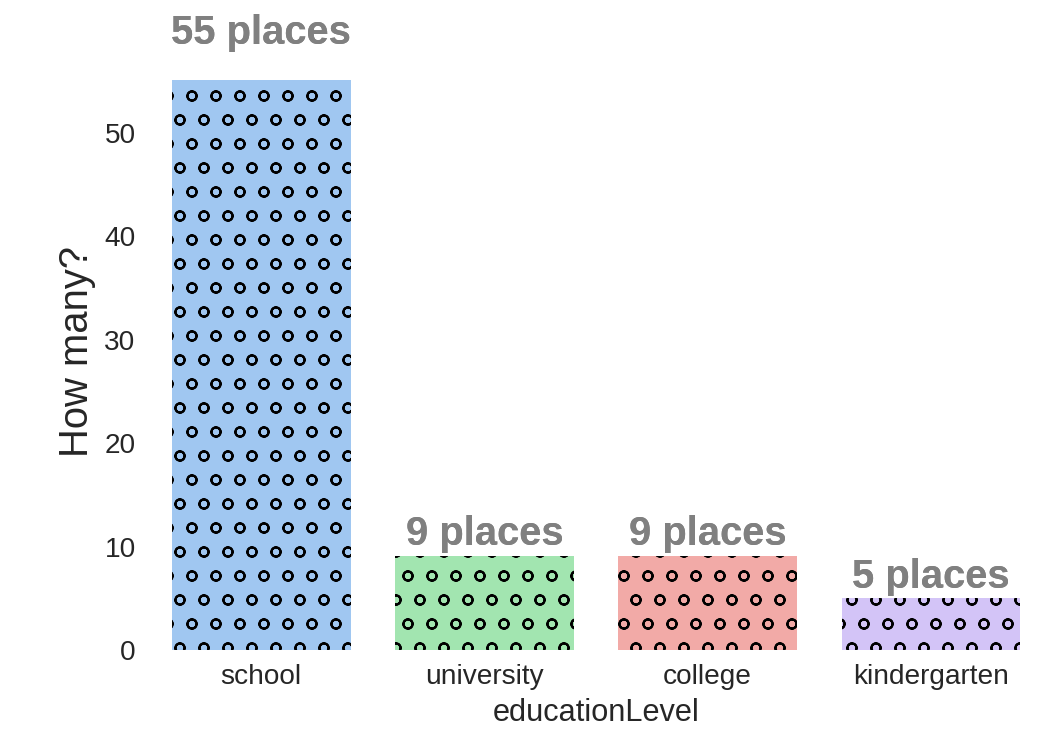

In [26]:
plot_education(getEducation())

## Who are top 5 contributors??

In [38]:
def get_top_contributors():
    match = {"$match": {"created": {"$exists": 1}}}
    group = {"$group": {"_id": "$created.user", "total": {"$sum": 1}}}
    sort = {"$sort": {"total": -1}}
    project = {"$project": {"_id": 0, "name": "$_id", "total_conrtributions": "$total"}}
    limit = {"$limit": 5}
    pipeline = [match, group, sort, project, limit]
    db = get_db('udacity')
    return aggregate(db, pipeline)

In [48]:
data = pd.DataFrame(get_top_contributors())
data['Rank'] = range(1, 6)
data.set_index('Rank')

,name,total_conrtributions
Rank,,
1,anushap,70489
2,Naresh08,66777
3,sdivya,64030
4,hareesh11,60736
5,pvprasad,58621
